Epoch 1/5
938/938 [==============================] - 435s 462ms/step - loss: 0.5156 - accuracy: 0.8080
Epoch 2/5
938/938 [==============================] - 423s 451ms/step - loss: 0.3233 - accuracy: 0.8809
Epoch 3/5
938/938 [==============================] - 421s 449ms/step - loss: 0.2753 - accuracy: 0.8993
Epoch 4/5
938/938 [==============================] - 417s 445ms/step - loss: 0.2457 - accuracy: 0.9093
Epoch 5/5
313/313 [==============================] - 18s 58ms/step - loss: 0.2867 - accuracy: 0.8941
Test loss 0.28667306900024414
Test accuracy 0.89410001039505
313/313 [==============================] - 18s 59ms/step
9


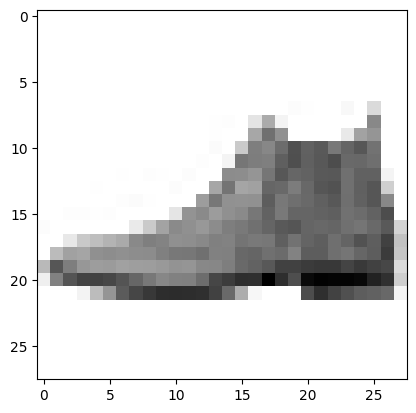

In [2]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
model = Sequential()
model.add(Conv2D(256, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
Dropout(0.20)
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Dropout(0.20)
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#Dropout(0.20)
model.add(Conv2D(28, (3,3)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#Dropout(0.20)
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()
